In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df=pd.read_csv("./dataset/ICICIBANK.csv",index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ICICIBANK,EQ,569.95,602.00,605.50,588.00,588.70,591.10,596.22,62584522,3.731429e+15,546696.0,16913351.0,0.2702
2021-04-27,ICICIBANK,EQ,591.10,593.25,601.95,591.10,599.00,598.75,597.63,24239685,1.448630e+15,233412.0,9056247.0,0.3736
2021-04-28,ICICIBANK,EQ,598.75,598.00,622.80,598.00,619.70,621.35,612.57,33292864,2.039422e+15,295406.0,14011476.0,0.4209


In [4]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [6]:
categorical_data=df.select_dtypes(include=['object']).columns

In [7]:
df['Date']=df.index

In [8]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [9]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [10]:
df=df.loc[mask]

In [11]:
df=df.ffill()

In [12]:
df['return'].isnull().values.any()

False

In [13]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,ICICIBANK,EQ,1145.10,1154.00,1158.40,1138.95,1140.35,1144.85,1148.52,1379646,1.584558e+14,NaN,532787.0,0.3862,2011-01-03,-0.021832
2011-01-04,ICICIBANK,EQ,1144.85,1145.70,1149.20,1098.10,1107.25,1104.05,1114.11,4175490,4.651973e+14,NaN,1957747.0,0.4689,2011-01-04,-3.563786
2011-01-05,ICICIBANK,EQ,1104.05,1097.20,1099.00,1065.00,1068.80,1069.35,1075.35,5307600,5.707528e+14,NaN,3091192.0,0.5824,2011-01-05,-3.142974
2011-01-06,ICICIBANK,EQ,1069.35,1074.25,1078.45,1047.25,1050.00,1053.45,1057.66,4769781,5.044794e+14,NaN,2590552.0,0.5431,2011-01-06,-1.486885
2011-01-07,ICICIBANK,EQ,1053.45,1045.00,1077.90,1041.00,1042.00,1049.20,1063.31,6178882,6.570046e+14,NaN,2948967.0,0.4773,2011-01-07,-0.403436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,ICICIBANK,EQ,503.60,506.75,515.95,505.10,513.05,513.55,512.50,17576807,9.008152e+14,161245.0,6829704.0,0.3886,2020-12-24,1.975774
2020-12-28,ICICIBANK,EQ,513.55,515.90,521.20,513.60,520.50,520.10,518.24,14470472,7.499174e+14,135145.0,5948817.0,0.4111,2020-12-28,1.275436
2020-12-29,ICICIBANK,EQ,520.10,522.55,530.80,517.85,530.10,528.80,524.61,19092649,1.001612e+15,210508.0,7990248.0,0.4185,2020-12-29,1.672755


In [14]:
df=df.drop(columns=['Date','Symbol','Series'])

In [15]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-01-03,1145.10,1154.00,1158.40,1138.95,1140.35,1144.85,1148.52,1379646,1.584558e+14,NaN,532787.0,0.3862,-0.021832
2011-01-04,1144.85,1145.70,1149.20,1098.10,1107.25,1104.05,1114.11,4175490,4.651973e+14,NaN,1957747.0,0.4689,-3.563786
2011-01-05,1104.05,1097.20,1099.00,1065.00,1068.80,1069.35,1075.35,5307600,5.707528e+14,NaN,3091192.0,0.5824,-3.142974
2011-01-06,1069.35,1074.25,1078.45,1047.25,1050.00,1053.45,1057.66,4769781,5.044794e+14,NaN,2590552.0,0.5431,-1.486885
2011-01-07,1053.45,1045.00,1077.90,1041.00,1042.00,1049.20,1063.31,6178882,6.570046e+14,NaN,2948967.0,0.4773,-0.403436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,503.60,506.75,515.95,505.10,513.05,513.55,512.50,17576807,9.008152e+14,161245.0,6829704.0,0.3886,1.975774
2020-12-28,513.55,515.90,521.20,513.60,520.50,520.10,518.24,14470472,7.499174e+14,135145.0,5948817.0,0.4111,1.275436
2020-12-29,520.10,522.55,530.80,517.85,530.10,528.80,524.61,19092649,1.001612e+15,210508.0,7990248.0,0.4185,1.672755


In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

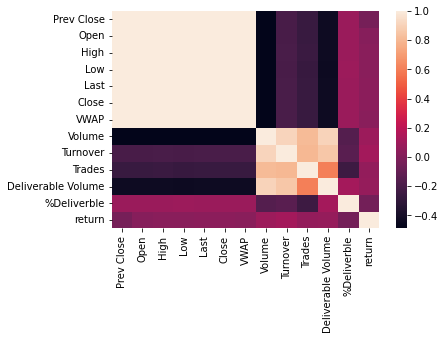

In [17]:
sn.heatmap(df.corr())

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [20]:
df=df.ffill(axis=0)
df['return'].isnull().values.any()

False

In [21]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-06-01,1086.10,1083.80,1088.50,1069.05,1084.80,1084.70,1078.91,2725196.0,2.940252e+14,64507.0,1267748.0,0.4652,-0.128902
2011-06-02,1084.70,1061.70,1062.00,1042.40,1051.10,1048.90,1053.89,2952892.0,3.112033e+14,75128.0,1457410.0,0.4936,-3.300452
2011-06-03,1048.90,1055.00,1068.00,1041.10,1051.05,1047.40,1056.13,2183795.0,2.306370e+14,53520.0,783536.0,0.3588,-0.143007
2011-06-06,1047.40,1040.00,1064.00,1035.50,1059.45,1058.05,1048.19,1462591.0,1.533077e+14,50627.0,494182.0,0.3379,1.016804
2011-06-07,1058.05,1050.30,1063.75,1050.05,1055.95,1056.15,1058.22,1368471.0,1.448138e+14,44051.0,569616.0,0.4162,-0.179576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,503.60,506.75,515.95,505.10,513.05,513.55,512.50,17576807.0,9.008152e+14,161245.0,6829704.0,0.3886,1.975774
2020-12-28,513.55,515.90,521.20,513.60,520.50,520.10,518.24,14470472.0,7.499174e+14,135145.0,5948817.0,0.4111,1.275436
2020-12-29,520.10,522.55,530.80,517.85,530.10,528.80,524.61,19092649.0,1.001612e+15,210508.0,7990248.0,0.4185,1.672755


In [22]:
train=df.iloc[:2250,12]
test=df.iloc[2250:,12]

In [23]:
Decomp_results=seasonal_decompose(df['return'])

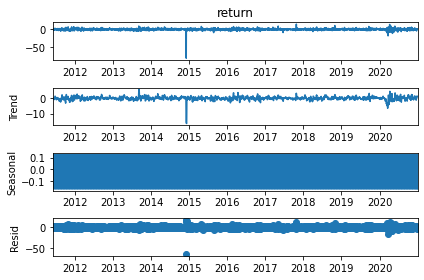

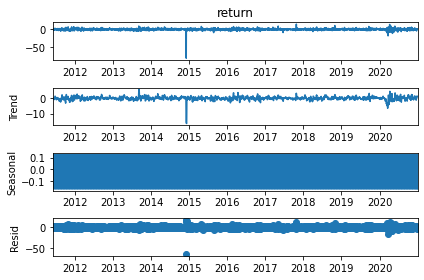

In [24]:
Decomp_results.plot()

In [25]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:2250]
exo_test=exo.iloc[2250:]


In [26]:
exo=exo.asfreq('B')

In [27]:
exo.ffill()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
Date,,,,,,,,,,,
2011-06-01,1086.10,1083.80,1088.50,1069.05,1084.80,1084.70,1078.91,2725196.0,2.940252e+14,64507.0,1267748.0
2011-06-02,1084.70,1061.70,1062.00,1042.40,1051.10,1048.90,1053.89,2952892.0,3.112033e+14,75128.0,1457410.0
2011-06-03,1048.90,1055.00,1068.00,1041.10,1051.05,1047.40,1056.13,2183795.0,2.306370e+14,53520.0,783536.0
2011-06-06,1047.40,1040.00,1064.00,1035.50,1059.45,1058.05,1048.19,1462591.0,1.533077e+14,50627.0,494182.0
2011-06-07,1058.05,1050.30,1063.75,1050.05,1055.95,1056.15,1058.22,1368471.0,1.448138e+14,44051.0,569616.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,503.60,506.75,515.95,505.10,513.05,513.55,512.50,17576807.0,9.008152e+14,161245.0,6829704.0
2020-12-28,513.55,515.90,521.20,513.60,520.50,520.10,518.24,14470472.0,7.499174e+14,135145.0,5948817.0
2020-12-29,520.10,522.55,530.80,517.85,530.10,528.80,524.61,19092649.0,1.001612e+15,210508.0,7990248.0


In [28]:
exo=np.nan_to_num(exo)

In [29]:
from pmdarima import auto_arima

In [30]:
auto_arima(df['return'],exogenous=exo,m=1,trace=True,D=1).summary()


Performing stepwise search to minimize aic


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10106.601, Time=3.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9786.611, Time=2.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9185.667, Time=2.78 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8684.107, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26853.550, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8660.922, Time=3.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8696.437, Time=3.72 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10102.736, Time=3.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8542.304, Time=3.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8463.538, Time=3.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8498.815, Time=3.84 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8415.741, Time=4.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=8428.043, Time=4.22 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=8416.410, Time=4.94 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=8432.119, Time=5.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8522.865, Time=4.49 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=8418.686, Time=5.61 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=8413.202, Time=5.19 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=4.97 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=8496.816, Time=4.74 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=8425.909, Time=5.38 sec
 ARIMA(1,1,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(1, 1, 5)   Log Likelihood               -4188.383
Date:                Sat, 04 Jun 2022   AIC                           8412.765
Time:                        13:46:32   BIC                           8517.605
Sample:                             0   HQIC                          8450.826
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0602   1.43e-31  -4.22e+29      0.000      -0.060      -0.060
x2            -0.0566   4.15e-32  -1.36e+30      0.000      -0.057      -0.057
x3            -0.0246   7.81e-32  -3.15e+29      0.000      -0.025      -0.025
x4            -0.0043    1.2e-31  -3.58e+28      0.000      -0.004      -0.004
x5            -0.0464   6.38e-33  -7.27e+30      0.000      -0.046      -0.046
x6             0.1868   2.64e-33   7.08e+31      0.000       0.187       0.187
x7             0.0039   3.29e-32   1.17e+29      0.000       0.004       0.004
x8          1.141e-07   9.36e-25   1.22e+17      0.000    1.14e-07    1.14e-07
x9          9.955e-16   3.29e-17     30.301      0.000    9.31e-16    1.06e-15
x10        -3.255e-06   3.73e-27  -8.73e+20      0.000   -3.25e-06   -3.25e-06
x11        -1.746e-07   5.44e-25  -3.21e+17      0.000   -1.75e-07   -1.75e-07
ar.L1         -0.6217    4.9e-33  -1.27e+32      0.000      -0.622      -0.622
ma.L1         -0.2020   1.96e-32  -1.03e+31      0.000      -0.202      -0.202
ma.L2         -0.5701    1.5e-32   -3.8e+31      0.000      -0.570      -0.570
ma.L3         -0.0395   2.11e-32  -1.87e+30      0.000      -0.040      -0.040
ma.L4         -0.0669   1.27e-32  -5.27e+30      0.000      -0.067      -0.067
ma.L5         -0.0218    1.5e-32  -1.45e+30      0.000      -0.022      -0.022
sigma2         1.7285   4.06e-33   4.26e+32      0.000       1.729       1.729
===================================================================================
Ljung-Box (L1) (Q):                   2.50   Jarque-Bera (JB):              5767.15
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.28e+48. Standard errors may be unstable.
"""

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.arima.ARIMA(train,exog=exo_train,order=(1,1,5))

Model=model.fit()

Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                 ARIMA(1, 1, 5)   Log Likelihood               -3493.764
Date:                Sat, 04 Jun 2022   AIC                           7023.528
Time:                        13:46:37   BIC                           7126.456
Sample:                    06-01-2011   HQIC                          7061.097
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close            -0.0589   2.01e-31  -2.93e+29      0.000      -0.059      -0.059
Open                  -0.0534   1.28e-31  -4.17e+29      0.000      -0.053      -0.053
High                  -0.0203   3.67e-32  -5.53e+29      0.000      -0.020      -0.020
Low                   -0.0042    1.7e-31  -2.49e+28      0.000      -0.004      -0.004
Last                  -0.0292   7.69e-32   -3.8e+29      0.000      -0.029      -0.029
Close                  0.1477   7.96e-32   1.86e+30      0.000       0.148       0.148
VWAP                   0.0175   1.08e-31   1.62e+29      0.000       0.018       0.018
Volume              1.084e-07   7.81e-25   1.39e+17      0.000    1.08e-07    1.08e-07
Turnover            3.014e-16   2.87e-17     10.507      0.000    2.45e-16    3.58e-16
Trades             -7.282e-07    2.6e-27   -2.8e+20      0.000   -7.28e-07   -7.28e-07
Deliverable Volume -1.301e-07   4.92e-25  -2.64e+17      0.000    -1.3e-07    -1.3e-07
ar.L1                 -0.3479   1.05e-33  -3.31e+32      0.000      -0.348      -0.348
ma.L1                 -0.4725   2.04e-32  -2.32e+31      0.000      -0.472      -0.472
ma.L2                 -0.3442   1.93e-32  -1.79e+31      0.000      -0.344      -0.344
ma.L3                 -0.0278    2.5e-32  -1.11e+30      0.000      -0.028      -0.028
ma.L4                 -0.0796   1.95e-32  -4.08e+30      0.000      -0.080      -0.080
ma.L5                 -0.0503   2.17e-32  -2.32e+30      0.000      -0.050      -0.050
sigma2                 1.3647   2.84e-33   4.81e+32      0.000       1.365       1.365
===================================================================================
Ljung-Box (L1) (Q):                   3.68   Jarque-Bera (JB):              2832.77
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.7e+48. Standard errors may be unstable.
"""

In [33]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred=Model.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')
print(pred)

2020-01-15   -0.579514
2020-01-16   -0.021714
2020-01-17   -0.728713
2020-01-20    0.335778
2020-01-21   -0.624493
                ...   
2020-12-25    1.232679
2020-12-28    0.617321
2020-12-29    1.035849
2020-12-30    0.243063
2020-12-31    1.479216
Freq: B, Name: predicted_mean, Length: 252, dtype: float64


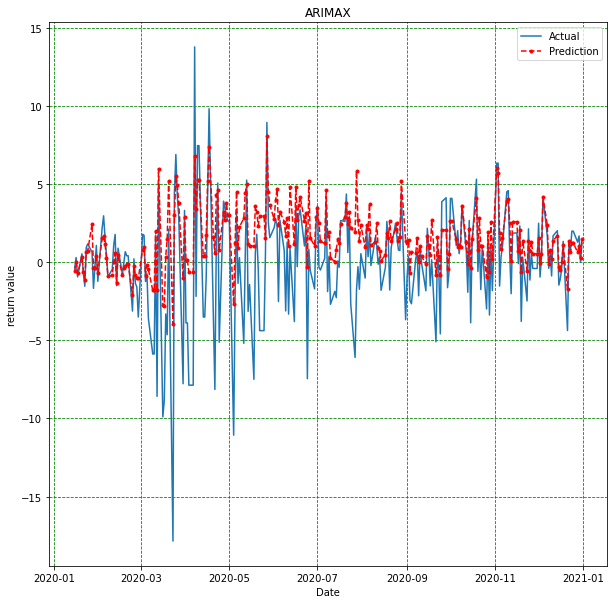

In [40]:
plt.figure(figsize=(10,10))
plt.plot(pred.index,test,label='Actual')
plt.plot(pred,label='Prediction',marker='.',linestyle='dashed',color='red')

plt.title('ARIMAX')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [35]:
import math
test=np.nan_to_num(test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred))
print(rmse)

2.8441846990483644


In [36]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred)
print(error)

1.9182366926157646


In [37]:
print('test mean')
test.mean()


test mean


0.03956471389278766

In [38]:
print('prediction mean')
pred.mean()

prediction mean


1.5370151297349153

In [39]:
from sklearn.metrics import r2_score
r2_score(test,pred)

0.3253069060017896